In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
AAPL_data_path = "/home/janis/EAP1/HFT_QR_RL/data/smash4/DB_MBP_10/AAPL/AAPL_2024-10-03_xnas-itch.parquet"

df = pd.read_parquet(AAPL_data_path)
df = df.reset_index().set_index("ts_event") # ça sert à mettre ts_event en index et pas en colonne


In [12]:
df.head(20)

,ts_recv,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol,date
ts_event,,,,,,,,,,,,,,,,,,,,,
2024-10-03 04:00:00.035617078-04:00,2024-10-03 04:00:00.035783424-04:00,10,2,38,A,N,0,223.21,440,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.035869514-04:00,2024-10-03 04:00:00.036035156-04:00,10,2,38,A,A,0,227.79,440,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.188545359-04:00,2024-10-03 04:00:00.188729434-04:00,10,2,38,A,A,1,228.00,1000,128,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.188582194-04:00,2024-10-03 04:00:00.188787632-04:00,10,2,38,A,B,1,223.00,2000,128,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.189844175-04:00,2024-10-03 04:00:00.190112774-04:00,10,2,38,A,A,2,228.20,2000,128,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.236955392-04:00,2024-10-03 04:00:00.237121539-04:00,10,2,38,A,B,0,225.32,400,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.236969753-04:00,2024-10-03 04:00:00.237136057-04:00,10,2,38,A,A,0,225.74,400,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.237808442-04:00,2024-10-03 04:00:00.237973528-04:00,10,2,38,C,A,0,225.74,400,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03
2024-10-03 04:00:00.237846286-04:00,2024-10-03 04:00:00.238012342-04:00,10,2,38,C,B,0,225.32,400,130,...,0,0,NaN,NaN,0,0,0,0,AAPL,2024-10-03


In [13]:
print('publisher_id', df["publisher_id"].unique())
print( 'rtype', df["rtype"].unique())

publisher_id [2]
rtype [10]


In [14]:
df["mid_price"] = df[["ask_px_00", "bid_px_00"]].mean(axis=1)
df["mid_price"] = df["mid_price"].combine_first(df["ask_px_00"]) # si mid_price est vide, on prend ask_px_00 pour les dispos
df["mid_price"] = df["mid_price"].combine_first(df["bid_px_00"]) # si mid_price est vide, on prend bid_px_00 pour les dispos

In [15]:
# Resample the mid_price values by second to get highest, lowest, and close prices
sampling_rate = '2s' # pandas sampling rate format is '1s' for 1 second, '1min' for 1 minute, '1h' for 1 hour, '1d' for 1 day

mid_prices_high = df["mid_price"].resample(sampling_rate).max().ffill()
mid_prices_low = df["mid_price"].resample(sampling_rate).min().ffill()
mid_prices_close = df["mid_price"].resample(sampling_rate).last().ffill()
mid_prices_open = df["mid_price"].resample(sampling_rate).first().ffill()

mid_prices_mean = df["mid_price"].resample(sampling_rate).mean().ffill()

# Combine the resampled mid_price values into a single DataFrame
mid_prices = pd.DataFrame({
    'mid_price_high': mid_prices_high,
    'mid_price_low': mid_prices_low,
    'mid_price_close': mid_prices_close,
    'mid_price_open': mid_prices_open,
    'mid_price_mean': mid_prices_mean
})

In [16]:
mid_prices["Returns"] = mid_prices["mid_price_close"].pct_change() # return calculation in pct, it's 

# Define a threshold for significant returns
threshold = 0.0

# Calculate the target based on the threshold
mid_prices["Target"] = mid_prices["Returns"].apply(lambda x: np.sign(x) if abs(x) > threshold else 0)
mid_prices.dropna(inplace=True)

open_time = "2024-10-03 13:30:00"
close_time = "2024-10-03 20:00:00"

price_between_time = mid_prices.loc[open_time:close_time]

price_between_time["Target"].value_counts()

Target
 0.0    8088
 1.0    1916
-1.0    1693
Name: count, dtype: int64

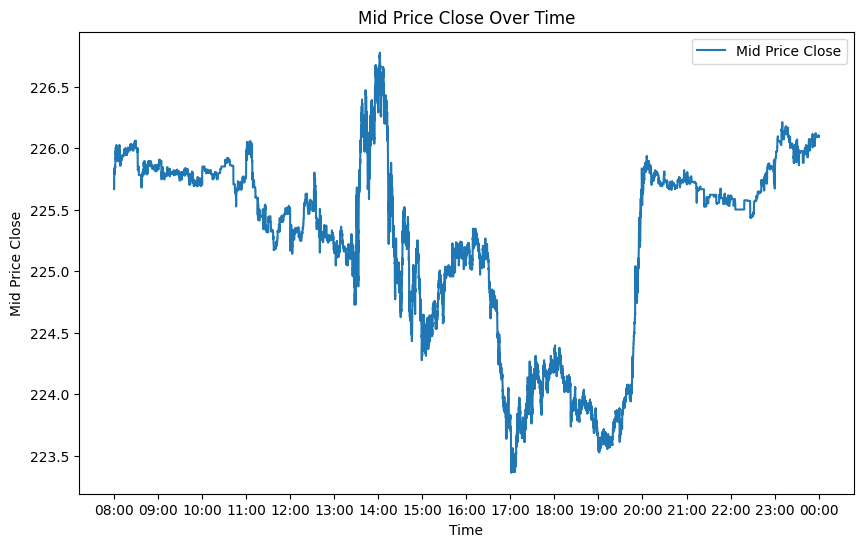

In [17]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mid_prices.index, mid_prices['mid_price_close'], label='Mid Price Close')
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title('Mid Price Close Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price Close')
plt.legend()
plt.show()

Clairement ici on regarde par tranche de 2 secondes le compte de toutes les actions produites

In [18]:
# Group by ts_event, action, and side, then sum the sizes
grouped = df.groupby([pd.Grouper(freq='s'), 'action', 'side'])['size'].sum().reset_index()

# Pivot the table to create new columns for each combination of action and side
order_sizes = grouped.pivot_table(index='ts_event', columns=['action', 'side'], values='size', fill_value=0)

order_sizes.drop(columns=[('A', 'N'), ('C', 'N'), ('T', 'N')], inplace=True)

action_mapping = {'A': 'add', 'C': 'cancel', 'T': 'trade'}
side_mapping = {'A': 'ask', 'B': 'bid'}

order_sizes.columns = [f'{action_mapping[action]}_{side_mapping[side]}_size' for action, side in order_sizes.columns]

order_sizes = order_sizes.reindex(mid_prices.index, fill_value=0)

order_sizes.head()


,add_ask_size,add_bid_size,cancel_ask_size,cancel_bid_size,trade_ask_size,trade_bid_size
ts_event,,,,,,
2024-10-03 04:00:02-04:00,638.0,2333.0,440.0,1173.0,0.0,110.0
2024-10-03 04:00:04-04:00,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03 04:00:06-04:00,1005.0,10.0,0.0,0.0,0.0,0.0
2024-10-03 04:00:08-04:00,37.0,119.0,0.0,0.0,0.0,0.0
2024-10-03 04:00:10-04:00,250.0,237.0,200.0,30.0,0.0,0.0


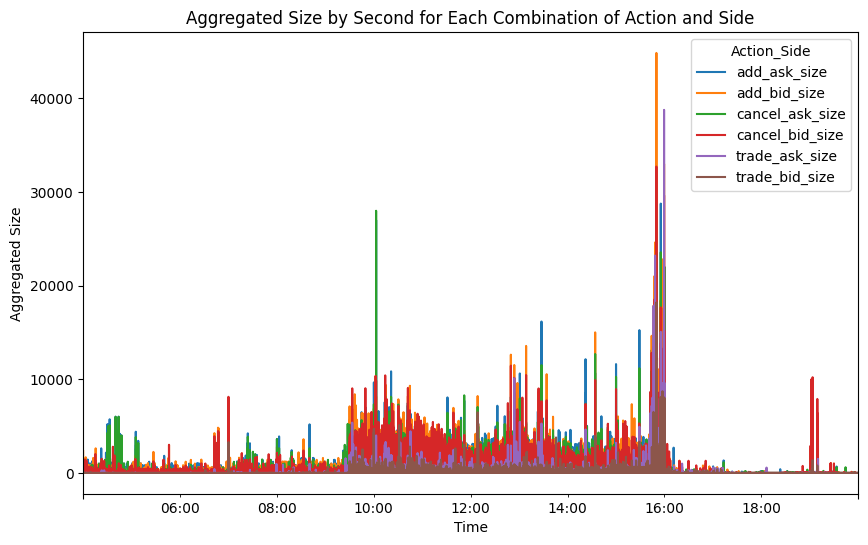

In [19]:
order_sizes.plot(figsize=(10, 6))
plt.title('Aggregated Size by Second for Each Combination of Action and Side')
plt.xlabel('Time')
plt.ylabel('Aggregated Size')
plt.legend(title='Action_Side')
plt.show()

In [ ]:
combined_df = pd.concat([mid_prices, order_sizes], axis=1)

combined_df.head()

In [ ]:
import ta

def compute_hft_indicators(df):
    """
    Compute high-frequency trading (HFT) indicators on second-level price data.
    Returns a new DataFrame with additional features.
    """
    indicators = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Faster Moving Averages
    indicators['EMA_5'] = ta.trend.ema_indicator(indicators['mid_price_close'], window=5)
    indicators['MA_5'] = indicators['mid_price_close'].rolling(window=5, min_periods=1).mean()

    # Bollinger Bands (adjusted to MA_5)
    indicators['Bollinger_Upper'] = indicators['MA_5'] + (indicators['mid_price_close'].rolling(5).std() * 2)
    indicators['Bollinger_Lower'] = indicators['MA_5'] - (indicators['mid_price_close'].rolling(5).std() * 2)

    # Compute DMP & DMN 
    indicators['High_Shift'] = indicators['mid_price_high'].shift(1)
    indicators['Low_Shift'] = indicators['mid_price_low'].shift(1)

    dmp_raw = np.where(
        (indicators['mid_price_high'] - indicators['High_Shift'] > indicators['Low_Shift'] - indicators['mid_price_low']),
        np.maximum(indicators['mid_price_high'] - indicators['High_Shift'], 0),
        0
    )

    dmn_raw = np.where(
        (indicators['Low_Shift'] - indicators['mid_price_low'] > indicators['mid_price_high'] - indicators['High_Shift']),
        np.maximum(indicators['Low_Shift'] - indicators['mid_price_low'], 0),
        0
    )

    indicators['DMP_3'] = pd.Series(dmp_raw, index=df.index).rolling(3, min_periods=1).sum()
    indicators['DMN_3'] = pd.Series(dmn_raw, index=df.index).rolling(3, min_periods=1).sum()

    indicators['OLL3'] = indicators['mid_price_open'] - indicators['mid_price_low'].rolling(window=3, min_periods=1).min()
    indicators['OLL5'] = indicators['mid_price_open'] - indicators['mid_price_low'].rolling(window=5, min_periods=1).min()

    indicators['STOCHk_7_3_3'] = ta.momentum.stoch(
        indicators['mid_price_high'], indicators['mid_price_low'], indicators['mid_price_close'], window=7, smooth_window=3
    )
    indicators['STOCHd_7_3_3'] = indicators['STOCHk_7_3_3'].rolling(3, min_periods=1).mean()

    # Drop temp columns
    indicators.drop(columns=['High_Shift', 'Low_Shift'], inplace=True)

    return indicators

# Example usage
df_hft = compute_hft_indicators(combined_df)

df_hft = df_hft.ffill()

last_nan_index = df_hft[df_hft.isna().any(axis=1)].index[-1]

df_hft = df_hft.iloc[df_hft.index.get_loc(last_nan_index)+1 :]

df_hft.head()

In [ ]:
df_hft["Target"].value_counts()